# Assignment 3
This file covers the solutions to the 2 questions on assignment 3.
1. Exploring Linear SVM classifer for a two-class classification problem.
2. Implement AdaBoost classifier with Linear SVM as the base learner.

In [2]:
# import packages
import pandas
import numpy as np
import scipy as sp
import scipy.linalg as sl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

## Question 1

In [15]:
# load dataset: q1_classA.csv and q1_classB.csv
classA_df = pandas.read_csv('datasets/q1_classA.csv', header=None, engine='python')
classB_df = pandas.read_csv('datasets/q1_classB.csv', header=None, engine='python')

# add labels 0 for class A and 1 for class B
classA_df['class'] = 0
classB_df['class'] = 1

# combine classA and classB
df = pandas.concat([classA_df, classB_df])

# seperate featres from targets
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

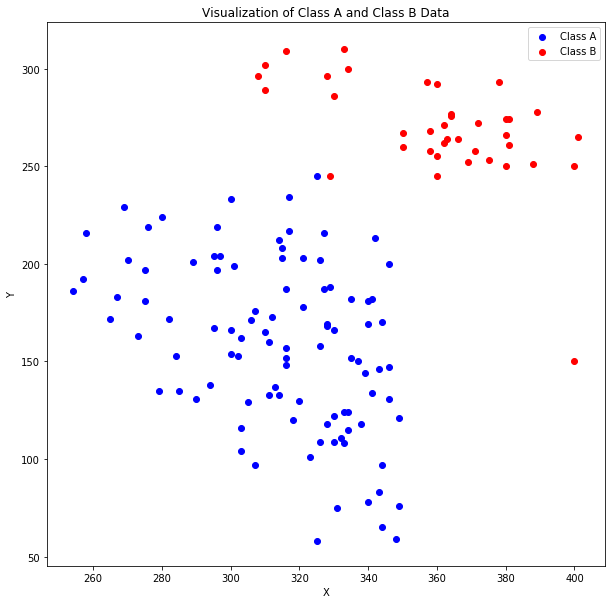

In [93]:
# part 1

# visualize class A and class B
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(classA_df[0], classA_df[1], c='b', label='Class A')
ax.scatter(classB_df[0], classB_df[1], c='r', label='Class B')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualization of Class A and Class B Data')
ax.legend()
plt.show()

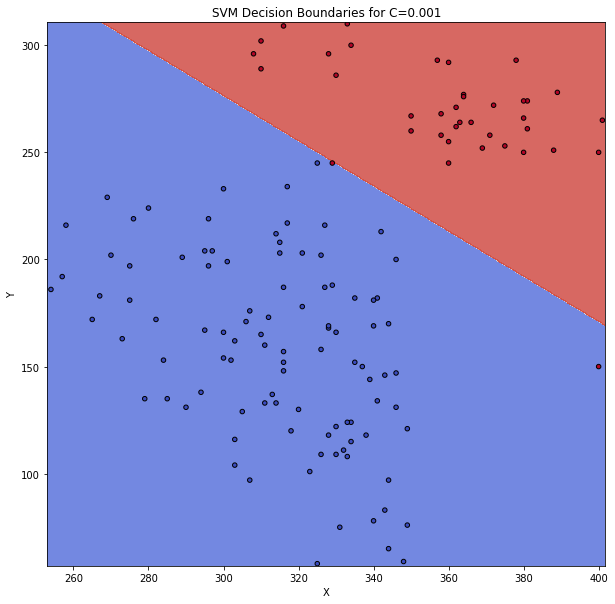

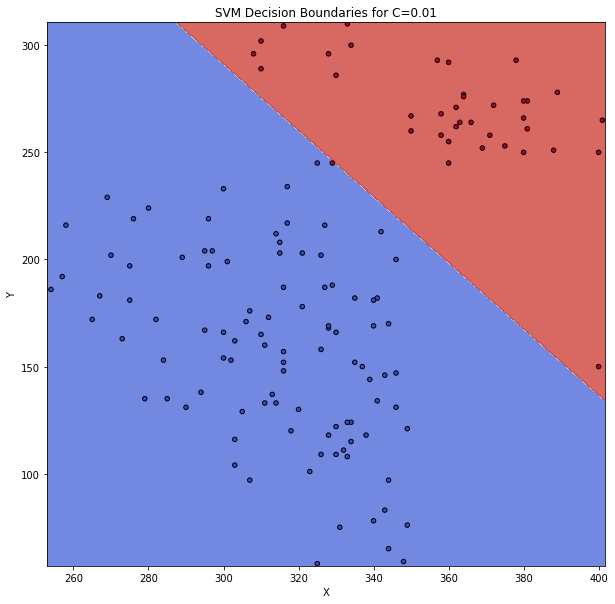

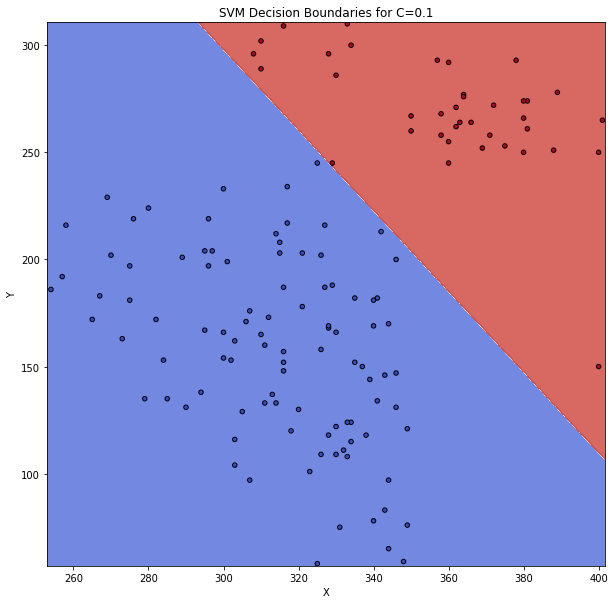

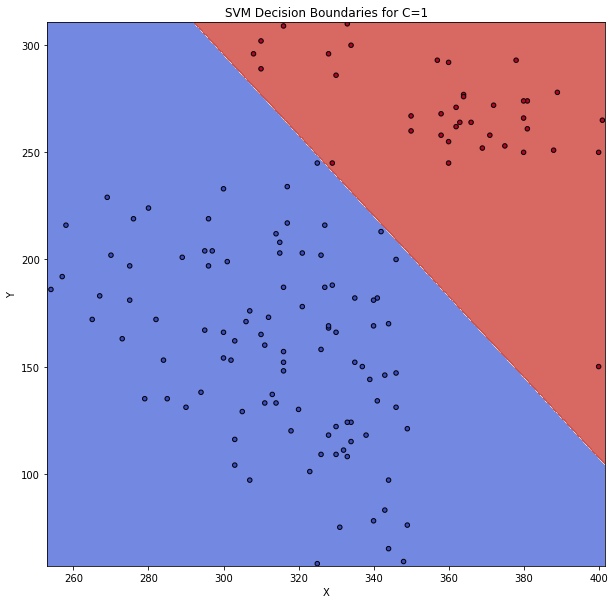

In [95]:
# part 2-4

def make_meshgrid(x, y, h=0.25):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


C = [0.001, 0.01, 0.1, 1]

for c in C:
    svm = SVC(C=c, kernel='linear')
    svm.fit(X, Y)
    
    # plot decision boundaries
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    
    fig, ax = plt.subplots(figsize=(10,10))
    plot_contours(ax, svm, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f"SVM Decision Boundaries for C={c}")
    plt.show()
    
    

## Question 2

In [2]:
# load dataset: classA.csv and classB.csv


In [1]:
# part 1
